# imports

In [1]:
import csv
import os,re,csv
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models
import gensim
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import plotly.plotly as py
import twitter
import json
import pandas as pd

In [2]:
import tweepy
import csv
import json

# setting up the csv files

In [97]:
enfj = pd.read_csv('E_N_F_J_Jun_6_15.csv')

In [98]:
enfj2 = pd.read_csv('E_N_F_J_Jun_6_23.csv')
enfj3 = pd.read_csv('E_N_F_J_Jun_6_30.csv')

In [99]:
enfj["Personality"] = 'enfj'
enfj2["Personality"] = 'enfj'
enfj3["Personality"] = 'enfj'

In [100]:
enfj.head()

,timestamp,tweet_text,username,image,followers_count,Personality
0,2019-06-15 23:12:00,b'@isierranichole I am an ENFJ and this has be...,b'pr3achlikeagirl',http://pbs.twimg.com/profile_images/1090079036...,67,enfj
1,2019-06-14 21:13:25,"b'@sacwriter I have always loved Myers-Briggs,...",b'ChurchTherapist',http://pbs.twimg.com/profile_images/1033441323...,1841,enfj
2,2019-06-13 19:25:06,b'So I took the Myers Briggs test and it said ...,b'camperry21',http://pbs.twimg.com/profile_images/1078547897...,1240,enfj
3,2019-06-13 04:23:33,b'For the record: I am an ENFJ.',b'galaxiaskykloz',http://pbs.twimg.com/profile_images/1001856767...,2227,enfj
4,2019-06-12 16:54:32,b'What are you on the Myer\xe2\x80\x99s Briggs...,b'sarahyoung_esq',http://pbs.twimg.com/profile_images/1090465009...,76,enfj


In [101]:
enfj2 = enfj2.drop('timestamp', axis=1)
enfj2 = enfj2.drop('tweet_text', axis=1)

enfj3 = enfj3.drop('timestamp', axis=1)
enfj3 = enfj3.drop('tweet_text', axis=1)

In [102]:
enfp = pd.read_csv('E_N_F_P_Jun_6_15.csv')
enfp["Personality"] = 'enfp'
enfp = enfp.drop('timestamp', axis=1)
enfp = enfp.drop('tweet_text', axis=1)

enfp2 = pd.read_csv('E_N_F_P_Jun_6_23.csv')
enfp2["Personality"] = 'enfp'
enfp2 = enfp2.drop('timestamp', axis=1)
enfp2 = enfp2.drop('tweet_text', axis=1)

enfp3 = pd.read_csv('E_N_F_P_Jun_6_30.csv')
enfp3["Personality"] = 'enfp'
enfp3 = enfp3.drop('timestamp', axis=1)
enfp3 = enfp3.drop('tweet_text', axis=1)

In [103]:
entj = pd.read_csv('E_N_T_J_Jun_6_15.csv')
entj["Personality"] = 'entj'
entj = entj.drop('timestamp', axis=1)
entj = entj.drop('tweet_text', axis=1)

entj2 = pd.read_csv('E_N_T_J_Jun_6_23.csv')
entj2["Personality"] = 'entj'
entj2 = entj2.drop('timestamp', axis=1)
entj2 = entj2.drop('tweet_text', axis=1)

entj3 = pd.read_csv('E_N_T_J_Jun_6_30.csv')
entj3["Personality"] = 'entj'
entj3 = entj3.drop('timestamp', axis=1)
entj3 = entj3.drop('tweet_text', axis=1)

In [104]:
enfj = enfj.drop('timestamp', axis=1)
enfj = enfj.drop('tweet_text', axis=1)

In [105]:
entp = pd.read_csv('E_N_T_P_Jun_6_15.csv')
entp["Personality"] = 'entp'
entp = entp.drop('timestamp', axis=1)
entp = entp.drop('tweet_text', axis=1)

entp2 = pd.read_csv('E_N_T_P_Jun_6_23.csv')
entp2["Personality"] = 'entp'
entp2 = entp2.drop('timestamp', axis=1)
entp2 = entp2.drop('tweet_text', axis=1)

entp3 = pd.read_csv('E_N_T_P_Jun_6_30.csv')
entp3["Personality"] = 'entp'
entp3 = entp3.drop('timestamp', axis=1)
entp3 = entp3.drop('tweet_text', axis=1)

In [106]:
esfj = pd.read_csv('E_S_F_J_Jun_6_15.csv')
esfj["Personality"] = 'esfj'
esfj = esfj.drop('timestamp', axis=1)
esfj = esfj.drop('tweet_text', axis=1)

esfj2 = pd.read_csv('E_S_F_J_Jun_6_23.csv')
esfj2["Personality"] = 'esfj'
esfj2 = esfj2.drop('timestamp', axis=1)
esfj2 = esfj2.drop('tweet_text', axis=1)

esfj3 = pd.read_csv('E_S_F_J_Jun_6_30.csv')
esfj3["Personality"] = 'esfj'
esfj3 = esfj3.drop('timestamp', axis=1)
esfj3 = esfj3.drop('tweet_text', axis=1)

In [107]:
esfp = pd.read_csv('E_S_F_P_Jun_6_15.csv')
esfp["Personality"] = 'esfp'
esfp = esfp.drop('timestamp', axis=1)
esfp = esfp.drop('tweet_text', axis=1)

esfp2 = pd.read_csv('E_S_F_P_Jun_6_23.csv')
esfp2["Personality"] = 'esfp'
esfp2 = esfp2.drop('timestamp', axis=1)
esfp2 = esfp2.drop('tweet_text', axis=1)

esfp3 = pd.read_csv('E_S_F_P_Jun_6_30.csv')
esfp3["Personality"] = 'esfp'
esfp3 = esfp3.drop('timestamp', axis=1)
esfp3 = esfp3.drop('tweet_text', axis=1)

In [108]:
estj = pd.read_csv('E_S_T_J_Jun_6_15.csv')
estj["Personality"] = 'estj'
estj = estj.drop('timestamp', axis=1)
estj = estj.drop('tweet_text', axis=1)

estj2 = pd.read_csv('E_S_T_J_Jun_6_23.csv')
estj2["Personality"] = 'estj'
estj2 = estj2.drop('timestamp', axis=1)
estj2 = estj2.drop('tweet_text', axis=1)

estj3 = pd.read_csv('E_S_T_J_Jun_6_30.csv')
estj3["Personality"] = 'estj'
estj3 = estj3.drop('timestamp', axis=1)
estj3 = estj3.drop('tweet_text', axis=1)

In [109]:
estp = pd.read_csv('E_S_T_P_Jun_6_15.csv')
estp["Personality"] = 'estp'
estp = estp.drop('timestamp', axis=1)
estp = estp.drop('tweet_text', axis=1)

estp2 = pd.read_csv('E_S_T_P_Jun_6_23.csv')
estp2["Personality"] = 'estp'
estp2 = estp2.drop('timestamp', axis=1)
estp2 = estp2.drop('tweet_text', axis=1)

estp3 = pd.read_csv('E_S_T_P_Jun_6_30.csv')
estp3["Personality"] = 'estp'
estp3 = estp3.drop('timestamp', axis=1)
estp3 = estp3.drop('tweet_text', axis=1)

In [110]:
infj = pd.read_csv('I_N_F_J_Jun_6_15.csv')
infj["Personality"] = 'infj'
infj = infj.drop('timestamp', axis=1)
infj = infj.drop('tweet_text', axis=1)

infj2 = pd.read_csv('I_N_F_J_Jun_6_23.csv')
infj2["Personality"] = 'infj'
infj2 = infj2.drop('timestamp', axis=1)
infj2 = infj2.drop('tweet_text', axis=1)

infj3 = pd.read_csv('I_N_F_J_Jun_6_30.csv')
infj3["Personality"] = 'infj'
infj3 = infj3.drop('timestamp', axis=1)
infj3 = infj3.drop('tweet_text', axis=1)

In [111]:
infp = pd.read_csv('I_N_F_P_Jun_6_15.csv')
infp["Personality"] = 'infp'
infp = infp.drop('timestamp', axis=1)
infp = infp.drop('tweet_text', axis=1)

infp2 = pd.read_csv('I_N_F_P_Jun_6_23.csv')
infp2["Personality"] = 'infp'
infp2 = infp2.drop('timestamp', axis=1)
infp2 = infp2.drop('tweet_text', axis=1)

infp3 = pd.read_csv('I_N_F_P_Jun_6_30.csv')
infp3["Personality"] = 'infp'
infp3 = infp3.drop('timestamp', axis=1)
infp3 = infp3.drop('tweet_text', axis=1)

In [112]:
intj = pd.read_csv('I_N_T_J_Jun_6_15.csv')
intj["Personality"] = 'intj'
intj = intj.drop('timestamp', axis=1)
intj = intj.drop('tweet_text', axis=1)

intj2 = pd.read_csv('I_N_T_J_Jun_6_23.csv')
intj2["Personality"] = 'intj'
intj2 = intj2.drop('timestamp', axis=1)
intj2 = intj2.drop('tweet_text', axis=1)

intj3 = pd.read_csv('I_N_T_J_Jun_6_30.csv')
intj3["Personality"] = 'intj'
intj3 = intj3.drop('timestamp', axis=1)
intj3 = intj3.drop('tweet_text', axis=1)

In [113]:
intp = pd.read_csv('I_N_T_P_Jun_6_15.csv')
intp["Personality"] = 'intp'
intp = intp.drop('timestamp', axis=1)
intp = intp.drop('tweet_text', axis=1)

intp2 = pd.read_csv('I_N_T_P_Jun_6_23.csv')
intp2["Personality"] = 'intp'
intp2 = intp2.drop('timestamp', axis=1)
intp2 = intp2.drop('tweet_text', axis=1)

intp3 = pd.read_csv('I_N_T_P_Jun_6_30.csv')
intp3["Personality"] = 'intp'
intp3 = intp3.drop('timestamp', axis=1)
intp3 = intp3.drop('tweet_text', axis=1)

In [114]:
isfj = pd.read_csv('I_S_F_J_Jun_6_15.csv')
isfj["Personality"] = 'isfj'
isfj = isfj.drop('timestamp', axis=1)
isfj = isfj.drop('tweet_text', axis=1)

isfj2 = pd.read_csv('I_S_F_J_Jun_6_23.csv')
isfj2["Personality"] = 'isfj'
isfj2 = isfj2.drop('timestamp', axis=1)
isfj2 = isfj2.drop('tweet_text', axis=1)

isfj3 = pd.read_csv('I_S_F_J_Jun_6_30.csv')
isfj3["Personality"] = 'isfj'
isfj3 = isfj3.drop('timestamp', axis=1)
isfj3 = isfj3.drop('tweet_text', axis=1)

In [115]:
istj = pd.read_csv('I_S_T_J_Jun_6_15.csv')
istj["Personality"] = 'istj'
istj = istj.drop('timestamp', axis=1)
istj = istj.drop('tweet_text', axis=1)

istj2 = pd.read_csv('I_S_T_J_Jun_6_23.csv')
istj2["Personality"] = 'istj'
istj2 = istj2.drop('timestamp', axis=1)
istj2 = istj2.drop('tweet_text', axis=1)

istj3 = pd.read_csv('I_S_T_J_Jun_6_30.csv')
istj3["Personality"] = 'istj'
istj3 = istj3.drop('timestamp', axis=1)
istj3 = istj3.drop('tweet_text', axis=1)

In [116]:
istp = pd.read_csv('I_S_T_P_Jun_6_15.csv')
istp["Personality"] = 'istp'
istp = istp.drop('timestamp', axis=1)
istp = istp.drop('tweet_text', axis=1)

istp2 = pd.read_csv('I_S_T_P_Jun_6_23.csv')
istp2["Personality"] = 'istp'
istp2 = istp2.drop('timestamp', axis=1)
istp2 = istp2.drop('tweet_text', axis=1)

istp3 = pd.read_csv('I_S_T_P_Jun_6_30.csv')
istp3["Personality"] = 'istp'
istp3 = istp3.drop('timestamp', axis=1)
istp3 = istp3.drop('tweet_text', axis=1)

In [117]:
isfp = pd.read_csv('I_S_F_P_Jun_6_15.csv')
isfp["Personality"] = 'isfp'
isfp = isfp.drop('timestamp', axis=1)
isfp = isfp.drop('tweet_text', axis=1)

isfp2 = pd.read_csv('I_S_F_P_Jun_6_23.csv')
isfp2["Personality"] = 'isfp'
isfp2 = isfp2.drop('timestamp', axis=1)
isfp2 = isfp2.drop('tweet_text', axis=1)

isfp3 = pd.read_csv('I_S_F_P_Jun_6_30.csv')
isfp3["Personality"] = 'isfp'
isfp3 = isfp3.drop('timestamp', axis=1)
isfp3 = isfp3.drop('tweet_text', axis=1)

# concatenate the dataframes

In [118]:
df = pd.concat([enfj, enfp, entj, entp, esfj, esfp, estj, estp,
                infj, infp, intj, intp, isfj, isfp, istj, istp,
                enfj2, enfp2, entj2, entp2, esfj2, esfp2, estj2, estp2,
                infj2, infp2, intj2, intp2, isfj2, isfp2, istj2, istp2, 
                enfj3, enfp3, entj3, entp3, esfj3, esfp3, estj3, estp3,
                infj3, infp3, intj3, intp3, isfj3, isfp3, istj3, istp3], 
               ignore_index=True)
df.head()

,username,image,followers_count,Personality
0,b'pr3achlikeagirl',http://pbs.twimg.com/profile_images/1090079036...,67,enfj
1,b'ChurchTherapist',http://pbs.twimg.com/profile_images/1033441323...,1841,enfj
2,b'camperry21',http://pbs.twimg.com/profile_images/1078547897...,1240,enfj
3,b'galaxiaskykloz',http://pbs.twimg.com/profile_images/1001856767...,2227,enfj
4,b'sarahyoung_esq',http://pbs.twimg.com/profile_images/1090465009...,76,enfj


In [119]:
df.shape

(175, 4)

In [121]:
df['Personality'].unique()

array(['enfj', 'enfp', 'entj', 'entp', 'infj', 'infp', 'intj', 'intp',
       'isfp', 'istj', 'istp', 'estj', 'isfj'], dtype=object)

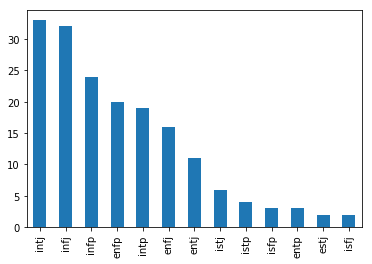

In [124]:
df['Personality'].value_counts().plot(kind='bar')

### set up the columns for the final dataframe

In [125]:
header_list = ['Personality', 'username', 'user_id', 'tweets', 'followers_count','image']
df = df.reindex(columns = header_list)
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,enfj,b'pr3achlikeagirl',NaN,NaN,67,http://pbs.twimg.com/profile_images/1090079036...
1,enfj,b'ChurchTherapist',NaN,NaN,1841,http://pbs.twimg.com/profile_images/1033441323...
2,enfj,b'camperry21',NaN,NaN,1240,http://pbs.twimg.com/profile_images/1078547897...
3,enfj,b'galaxiaskykloz',NaN,NaN,2227,http://pbs.twimg.com/profile_images/1001856767...
4,enfj,b'sarahyoung_esq',NaN,NaN,76,http://pbs.twimg.com/profile_images/1090465009...


# set up the tweepy credentials to access data from twitter

In [126]:
import json

# create a dictionary to store your twitter credentials

twitter_cred = dict()


twitter_cred['CONSUMER_KEY'] = 'FYkqgdipLO6z3Cypq9df7u5Sl'
twitter_cred['CONSUMER_SECRET'] = 'JJdJ7Ae4x5WI9VRMyCkcPVZO14eHaMZJjzFXSpO6WkPKB150oO'
twitter_cred['ACCESS_KEY'] = '1141049557322592256-zBZj5YJssmyl60B6jXpdCP5qbMZpIZ'
twitter_cred['ACCESS_SECRET'] = 'q7EjUt7RJjQaCXXObSXON6gyIDDfwPsbeBbGE74hC9Paw'

with open('twitter_credentials1.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)
#Your saved json will look like the one shown below. It will be saved in the current directory under the name twitter_credentials.json.


In [127]:
api = twitter.Api(consumer_key='FYkqgdipLO6z3Cypq9df7u5Sl',
                      consumer_secret='JJdJ7Ae4x5WI9VRMyCkcPVZO14eHaMZJjzFXSpO6WkPKB150oO',
                      access_token_key='1141049557322592256-zBZj5YJssmyl60B6jXpdCP5qbMZpIZ',
                      access_token_secret='q7EjUt7RJjQaCXXObSXON6gyIDDfwPsbeBbGE74hC9Paw')

In [128]:
auth = tweepy.OAuthHandler(twitter_cred['CONSUMER_KEY'], twitter_cred['CONSUMER_SECRET'])
auth.set_access_token(twitter_cred['ACCESS_KEY'], twitter_cred['ACCESS_SECRET'])
api = tweepy.API(auth)

# fix up the username column

In [129]:
print(type(df['username']))

usernames = list(df['username'])

#there are two problems here--we have the extra set of quotes and the b in front

for i in range(len(usernames)):
    usernames[i] = usernames[i][1:]
    usernames[i] = usernames[i].replace('\'', '')

print(usernames)

<class 'pandas.core.series.Series'>
['pr3achlikeagirl', 'ChurchTherapist', 'camperry21', 'galaxiaskykloz', 'sarahyoung_esq', 'filmandtheatre', 'MeghanLeVota', 'ukthxbyek', '2dancingpandas', 'DotsWritingDojo', 'SerinaMartinez', 'SandraSchehl', 'IAmCloutier', 'DamnSheElite', 'justSona', 'RLBEchad', 'Megan_Hafer', 'Cemeterylegends', 'techmariah', 'heiseinbitch', 'madihamberger', 'a_rdirivera', 'a_rdirivera', 'ladykrisffer', 'onthewaybg', 'patchworkcc2015', 'JanAryannn', 'laura_la_plante', 'harmonicait', 'Soulonajourney1', 'Colleen_Kellogg', 'pagesandpanels', 'mb_times', 'AlphritaSims', 'ayakanesmoon', 'TheINFP_Bear', 'JordanMarisa11', 'AlexS_Writes', 'airublu', 'S7r94', 'CRHarrisWrites', 'nikaizd', 'joemillerwired', 'stephcode', 'JohnBauters', 'TIL_ayg', 'ActionBearson', 'kathryn222882', 'kuehlapis12', 'apbeaton', 'TIL_ayg', 'TIL_ayg', 'imnotasweetie', 'gukmulie', 'xernue', 'BruceSutherlan4', 'nerd_backpack', 'parkjiminfocus', 'namgiaesthetics', 'xasoiaf', 'dylanw', 'c11192019', 'Juliamag

We see that the usernames each have a b in front, so we need to remove the first character of each string, and also the extra set of quotes. We need to remove these in order to pass the username to the other twitter functions.

In [130]:
print(usernames[2])

#get_user_text(df['username'][2])

print(usernames[2]== 'camperry21')
print(usernames[2]== "'camperry21'")

s = usernames[2][1: ]
s = usernames[2].replace('\'', '')


print(s == 'camperry21')
print(s == "'camperry21'")


camperry21
True
False
True
False


In [131]:
api.get_user(screen_name = s).id

26539824

In [132]:
#create a list of user_ids
user_id = []
i = 0

for item in usernames:
    try:
        user_id.append(api.get_user(screen_name = item).id)
    except:
        i = i + 1
        print(item)
        print("badvalue")
        user_id.append("NA")

print(i)


parkjiminfocus
badvalue
c11192019
badvalue
2


In [133]:
print(user_id)

[2310890684, 860692122, 26539824, 2268542497, 1090462781189603334, 368638327, 1016060366885879811, 1069713189565317120, 1064558148621672449, 892628175003561986, 373747793, 1016119048948592641, 916158223660466176, 1074837907117096960, 49770611, 1145567258, 723120356, 104966244, 985311539396857856, 337081254, 44798649, 2182094762, 2182094762, 42204615, 994879402335985664, 2600140712, 554953566, 242116581, 29117113, 1136735386741481472, 2550751028, 866821201309696001, 986664812007440384, 1040826691013226501, 2992811026, 1005805780581244928, 956004158, 2518422924, 888699183909220352, 494985443, 1112816199623008256, 483703094, 80192116, 157133120, 4131566172, 872117274076950533, 2379028219, 1137751142278914048, 958762990043475968, 1641671990, 872117274076950533, 872117274076950533, 2177120454, 927507836338282496, 1078111146119327745, 1716205759, 1012694025319546880, 'NA', 914109174530871296, 1120360803130052609, 886331, 'NA', 3432894455, 1080970817717108738, 866876573856653312, 2238714246, 

### why are there still some bad values?

In [134]:
df['username'] = usernames

In [135]:
df['user_id'] = user_id

In [136]:
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,enfj,pr3achlikeagirl,2310890684,NaN,67,http://pbs.twimg.com/profile_images/1090079036...
1,enfj,ChurchTherapist,860692122,NaN,1841,http://pbs.twimg.com/profile_images/1033441323...
2,enfj,camperry21,26539824,NaN,1240,http://pbs.twimg.com/profile_images/1078547897...
3,enfj,galaxiaskykloz,2268542497,NaN,2227,http://pbs.twimg.com/profile_images/1001856767...
4,enfj,sarahyoung_esq,1090462781189603334,NaN,76,http://pbs.twimg.com/profile_images/1090465009...


# now lets work on the tweet text column

In [137]:
twitter_cred['CONSUMER_KEY'] = 'FYkqgdipLO6z3Cypq9df7u5Sl'
twitter_cred['CONSUMER_SECRET'] = 'JJdJ7Ae4x5WI9VRMyCkcPVZO14eHaMZJjzFXSpO6WkPKB150oO'
twitter_cred['ACCESS_KEY'] = '1141049557322592256-zBZj5YJssmyl60B6jXpdCP5qbMZpIZ'
twitter_cred['ACCESS_SECRET'] = 'q7EjUt7RJjQaCXXObSXON6gyIDDfwPsbeBbGE74hC9Paw'

In [138]:
def get_all_tweets(screen_name):
#Twitter only allows access to a users most recent 3240 tweets with this method

    consumer_key = twitter_cred['CONSUMER_KEY']
    consumer_secret = twitter_cred['CONSUMER_SECRET']
    access_token = twitter_cred['ACCESS_KEY']
    access_token_secret = twitter_cred['ACCESS_SECRET']

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    auth.secure = True
    api = tweepy.API(auth)
    
#initialize a list to hold all the tweepy Tweets
    alltweets = []

#make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name, count=200, include_rts=False, tweet_mode = 'extended')

#save most recent tweets
    alltweets.extend(new_tweets)

#save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

#keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        #print("collecting tweets before %s" % (oldest))

    #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest,tweet_mode = 'extended')

    #save most recent tweets
        alltweets.extend(new_tweets)

    #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        #print("...%s tweets downloaded so far" % (len(alltweets)))
        #print("##############################################################")
        #uncomment  below if want the tweets printout
        #print(alltweets[0])

#transform the tweepy tweets into a 2D array that will populate the csv

    outtweets = []
    for tweet in alltweets:
        ## added the language requirement
        if(len(tweet.full_text)>0) and tweet.lang == "en":
            outtweets.append(tweet.full_text)
        else:
            outtweets.append('')
    user_text = []
    for item in outtweets:
        if item.startswith("RT"):
            continue
        #take out URLS
        replaced = re.sub('http\S+','', item)
        #replace all user tages with generic @user
        replaced = re.sub('@\S+','@user', replaced)
        replaced = re.sub('\"\S+\"','',replaced)
        user_text.append(replaced)

    return(user_text)

In [139]:
df['username'][0]

'pr3achlikeagirl'

In [140]:
tweets = get_all_tweets('pr3achlikeagirl')

In [141]:
print(tweets[0:5])

['God is on the move!', 'Stop telling God what you DON’T have, and instead give Christ what you DO have and let him take it, bless it, break it, and multiply it for his glory!', '“In the hands of Jesus, all things become possible.” - Dr. David Busic', 'Watching people I love receive their district licenses and Ordination is a very emotional experience for me. I love seeing and hearing how far God has brought them... and I love their obedience to God as they follow his call upon their lives. #2019pghcotndistrictassembly', 'Not our own righteousness/but Christ within/living and reigning and saving from sin. #HolinessUntoTheLord #CalledUntoHoliness']


In [142]:
tweets = get_all_tweets(df['username'][0])

In [143]:
print(len(tweets))

194


In [144]:
print(tweets)

['God is on the move!', 'Stop telling God what you DON’T have, and instead give Christ what you DO have and let him take it, bless it, break it, and multiply it for his glory!', '“In the hands of Jesus, all things become possible.” - Dr. David Busic', 'Watching people I love receive their district licenses and Ordination is a very emotional experience for me. I love seeing and hearing how far God has brought them... and I love their obedience to God as they follow his call upon their lives. #2019pghcotndistrictassembly', 'Not our own righteousness/but Christ within/living and reigning and saving from sin. #HolinessUntoTheLord #CalledUntoHoliness', 'Pittsburg District COTN teen camp #pittproud #pitt4life #cotn #pghteencamp2019 ', '@user For some reason, this video was marked as “sensitive content” in my newsfeed... wut?', 'The solid rock foundation is not a biblical worldview—it is Christ alone! On Christ the solid rock I stand, all other ground is sinking sand. A biblical worldview is 

In [145]:
tweet_text = []

In [202]:
print(usernames)

['pr3achlikeagirl', 'ChurchTherapist', 'camperry21', 'galaxiaskykloz', 'sarahyoung_esq', 'filmandtheatre', 'MeghanLeVota', 'ukthxbyek', '2dancingpandas', 'DotsWritingDojo', 'SerinaMartinez', 'SandraSchehl', 'IAmCloutier', 'DamnSheElite', 'justSona', 'RLBEchad', 'Megan_Hafer', 'Cemeterylegends', 'techmariah', 'heiseinbitch', 'madihamberger', 'a_rdirivera', 'a_rdirivera', 'ladykrisffer', 'onthewaybg', 'patchworkcc2015', 'JanAryannn', 'laura_la_plante', 'harmonicait', 'Soulonajourney1', 'Colleen_Kellogg', 'pagesandpanels', 'mb_times', 'AlphritaSims', 'ayakanesmoon', 'TheINFP_Bear', 'JordanMarisa11', 'AlexS_Writes', 'airublu', 'S7r94', 'CRHarrisWrites', 'nikaizd', 'joemillerwired', 'stephcode', 'JohnBauters', 'TIL_ayg', 'ActionBearson', 'kathryn222882', 'kuehlapis12', 'apbeaton', 'TIL_ayg', 'TIL_ayg', 'imnotasweetie', 'gukmulie', 'xernue', 'BruceSutherlan4', 'nerd_backpack', 'parkjiminfocus', 'namgiaesthetics', 'xasoiaf', 'dylanw', 'c11192019', 'Juliamagdazrc', 'Wanderingc0rpse', 'rapartin

In [185]:
i = 0

for i in range(len(usernames)):
    try:
        tweet_text.append(get_all_tweets(usernames[i]))
    except:
        i = i + 1
        tweet_text.append('NA')
    print(i)
    print(tweet_text[i][0])



1
@user It describes anxious attachment as opposed to secure attachment
2
@user @user He ain't winning with the Clippers though. Wouldn't make sense to go to a worse team
3
does anyone remember poopreport dot com
4
MeatPotatoesNBeans 
5
oh my god she is adorable i love her so much 
6
@user I’m an ENFJ 1) individualization 2) futuristic 3) connectedness 4) maximizer 5) relator
7
@user I realize I lied because if I file the serial numbers off a series me and a friend are writing it will be detailed. 
8
@user Wow!  What a great picture!  Expresses so much love :)
9
@user Good that you shared this online. Very insulting emails! :-(
10
When people say you have a nice smile... what’s the criteria? Because I’ve had a lot of people tell me I have a nice smile, but I feel like all smiles are nice. Like a person’s whole face lights up when they smile. What’s not nice about that? 🤔
11
I wrote 2700 words during Sunday sprints today and it looked like my writing peeps also got a lot of words in.  O

In [184]:
print(len(tweet_text))
print(len(usernames))

217
175


In [ ]:
print(type(tweet_text))

In [188]:
########### call the get_all_tweets function on each user_name to fill in the row of the dataframe########
len(df['tweets'])

175

In [190]:
len(tweet_text[0:175])

175

In [191]:
df['tweets'] = tweet_text[0:175]

In [192]:
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,enfj,pr3achlikeagirl,2310890684,"[God is on the move!, Stop telling God what yo...",67,http://pbs.twimg.com/profile_images/1090079036...
1,enfj,ChurchTherapist,860692122,[@user It describes anxious attachment as oppo...,1841,http://pbs.twimg.com/profile_images/1033441323...
2,enfj,camperry21,26539824,[@user @user He ain't winning with the Clipper...,1240,http://pbs.twimg.com/profile_images/1078547897...
3,enfj,galaxiaskykloz,2268542497,"[does anyone remember poopreport dot com, @use...",2227,http://pbs.twimg.com/profile_images/1001856767...
4,enfj,sarahyoung_esq,1090462781189603334,"[MeatPotatoesNBeans , THE LITTLE BLEP TONGUE😭 ...",76,http://pbs.twimg.com/profile_images/1090465009...


# fix the image URLs

In [194]:
images = list(df['image'])
print(images[0:5])

['http://pbs.twimg.com/profile_images/1090079036779491328/ABkMyFmP.jpg', 'http://pbs.twimg.com/profile_images/1033441323725017095/5hjLpnZX.jpg', 'http://pbs.twimg.com/profile_images/1078547897883480064/PsrSCGBs.jpg', 'http://pbs.twimg.com/profile_images/1001856767976984576/uA8fS2eY.jpg', 'http://pbs.twimg.com/profile_images/1090465009946279936/Iybl4bmr.jpg']


In [195]:
print(type(images[0]))

<class 'str'>


In [196]:
print(images[0])
images[0] = images[0].replace('_normal', '')
print(images[0])
                        

http://pbs.twimg.com/profile_images/1090079036779491328/ABkMyFmP.jpg
http://pbs.twimg.com/profile_images/1090079036779491328/ABkMyFmP.jpg


In [197]:
for i in range(len(images)):
    images[i] = images[i].replace('_normal', '')

In [198]:
print(images[0:5])

['http://pbs.twimg.com/profile_images/1090079036779491328/ABkMyFmP.jpg', 'http://pbs.twimg.com/profile_images/1033441323725017095/5hjLpnZX.jpg', 'http://pbs.twimg.com/profile_images/1078547897883480064/PsrSCGBs.jpg', 'http://pbs.twimg.com/profile_images/1001856767976984576/uA8fS2eY.jpg', 'http://pbs.twimg.com/profile_images/1090465009946279936/Iybl4bmr.jpg']


In [199]:
df['image'] = images


In [200]:
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,enfj,pr3achlikeagirl,2310890684,"[God is on the move!, Stop telling God what yo...",67,http://pbs.twimg.com/profile_images/1090079036...
1,enfj,ChurchTherapist,860692122,[@user It describes anxious attachment as oppo...,1841,http://pbs.twimg.com/profile_images/1033441323...
2,enfj,camperry21,26539824,[@user @user He ain't winning with the Clipper...,1240,http://pbs.twimg.com/profile_images/1078547897...
3,enfj,galaxiaskykloz,2268542497,"[does anyone remember poopreport dot com, @use...",2227,http://pbs.twimg.com/profile_images/1001856767...
4,enfj,sarahyoung_esq,1090462781189603334,"[MeatPotatoesNBeans , THE LITTLE BLEP TONGUE😭 ...",76,http://pbs.twimg.com/profile_images/1090465009...


In [201]:
df

,Personality,username,user_id,tweets,followers_count,image
0,enfj,pr3achlikeagirl,2310890684,"[God is on the move!, Stop telling God what yo...",67,http://pbs.twimg.com/profile_images/1090079036...
1,enfj,ChurchTherapist,860692122,[@user It describes anxious attachment as oppo...,1841,http://pbs.twimg.com/profile_images/1033441323...
2,enfj,camperry21,26539824,[@user @user He ain't winning with the Clipper...,1240,http://pbs.twimg.com/profile_images/1078547897...
3,enfj,galaxiaskykloz,2268542497,"[does anyone remember poopreport dot com, @use...",2227,http://pbs.twimg.com/profile_images/1001856767...
4,enfj,sarahyoung_esq,1090462781189603334,"[MeatPotatoesNBeans , THE LITTLE BLEP TONGUE😭 ...",76,http://pbs.twimg.com/profile_images/1090465009...
5,enfj,filmandtheatre,368638327,[oh my god she is adorable i love her so much ...,6031,http://pbs.twimg.com/profile_images/1137455550...
6,enfj,MeghanLeVota,1016060366885879811,[@user I’m an ENFJ 1) individualization 2) fut...,1038,http://pbs.twimg.com/profile_images/1133759007...
7,enfp,ukthxbyek,1069713189565317120,[@user I realize I lied because if I file the ...,225,http://pbs.twimg.com/profile_images/1135702016...
8,enfp,2dancingpandas,1064558148621672449,[@user Wow! What a great picture! Expresses ...,310,http://pbs.twimg.com/profile_images/1111719068...
9,enfp,DotsWritingDojo,892628175003561986,[@user Good that you shared this online. Very ...,253,http://pbs.twimg.com/profile_images/1136308065...


# export to a CSV file

In [193]:
personalities_df = df.to_csv ('personalities.csv', index = None, header=True)